# Init

In [99]:
import sqlite3
import pandas as pd

# Connexion à la base SQLite
conn = sqlite3.connect("../data/accidents.db")

# Test : lister les tables
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)

               name
0  dim_localisation
1      dim_contexte
2         dim_temps
3    fact_accidents
4        dim_usager
5      dim_vehicule


# Explo

In [100]:
schema = {}
for table in tables["name"]:
    cols = pd.read_sql_query(f"PRAGMA table_info({table});", conn)
    schema[table] = cols[["name", "type"]]
    print(f"\n🧱 Table: {table}")
    display(cols[["name", "type"]])


🧱 Table: dim_localisation


,name,type
0,id_localisation,TEXT
1,nom_commune,TEXT
2,agglomeration,TEXT
3,departement_code,TEXT
4,nom_departement,TEXT
5,commune_code,TEXT
6,adresse_postale,TEXT
7,code_postal,TEXT



🧱 Table: dim_contexte


,name,type
0,id_contexte,TEXT
1,lumiere,TEXT
2,intersection,TEXT
3,condition_atmos,TEXT
4,collision,TEXT
5,type_surface,TEXT
6,regime_circulation,TEXT
7,voie_reservee,TEXT
8,proximite_ecole,TEXT
9,nombre_voie_circulation,INTEGER



🧱 Table: dim_temps


,name,type
0,id_date,TEXT
1,annee,INTEGER
2,mois,INTEGER
3,jour,INTEGER
4,hrmn,TEXT
5,date,TEXT



🧱 Table: fact_accidents


,name,type
0,id_accident,TEXT
1,num_acc,INTEGER
2,obstacle_mobile_heurte,TEXT
3,obstacle_fixe_heurte,TEXT
4,id_localisation,TEXT
5,id_contexte,TEXT
6,id_date,TEXT



🧱 Table: dim_usager


,name,type
0,id_usager,TEXT
1,annee_naissance,INTEGER
2,sexe,TEXT
3,gravite_accident,TEXT
4,securite,TEXT
5,locp,TEXT
6,place,TEXT
7,categorie_usager,TEXT
8,booster,TEXT
9,trajet,TEXT



🧱 Table: dim_vehicule


,name,type
0,id_vehicule,TEXT
1,catv,TEXT
2,num_veh,TEXT
3,choc,TEXT
4,manoeuvre_av_accident,TEXT
5,id_accident,TEXT


# make schema

In [101]:
relations = []
for table in tables["name"]:
    fks = pd.read_sql_query(f"PRAGMA foreign_key_list({table});", conn)
    if not fks.empty:
        for _, row in fks.iterrows():
            relations.append({
                "table_source": table,
                "col_source": row["from"],
                "table_target": row["table"],
                "col_target": row["to"]
            })
relations_df = pd.DataFrame(relations)
display(relations_df)


,table_source,col_source,table_target,col_target
0,fact_accidents,id_date,dim_temps,id_date
1,fact_accidents,id_contexte,dim_contexte,id_contexte
2,fact_accidents,id_localisation,dim_localisation,id_localisation
3,dim_usager,id_accident,fact_accidents,id_accident
4,dim_vehicule,id_accident,fact_accidents,id_accident


In [102]:
from graphviz import Digraph
# from IPython.display import Image

dot = Digraph(comment="Schéma base accidents", format="png")
for table, cols in schema.items():
    label = f"{table}\n" + "\n".join(cols['name'])
    dot.node(table, label=label, shape="box")
for _, r in relations_df.iterrows():
    dot.edge(r["table_source"], r["table_target"], label=f"{r['col_source']} → {r['col_target']}")
dot.render("schema_accidents", cleanup=True)
# Image("schema_accidents.png")

'schema_accidents.png'

# Mermaid

![Schéma de la base d'accidents](schematest2.png)

# split all df

In [103]:
df_dim_localisation = pd.read_sql_query("SELECT * FROM dim_localisation LIMIT 10;", conn)
df_dim_contexte = pd.read_sql_query("SELECT * FROM dim_contexte LIMIT 10;", conn)
df_dim_temps = pd.read_sql_query("SELECT * FROM dim_temps LIMIT 10;", conn)
df_accidents = pd.read_sql_query("SELECT * FROM fact_accidents LIMIT 10;", conn)
df_dim_usager = pd.read_sql_query("SELECT * FROM dim_usager LIMIT 10;", conn)
df_dim_vehicule = pd.read_sql_query("SELECT * FROM dim_vehicule LIMIT 10;", conn)

"""
display(df_dim_localisation.head())
display(df_dim_contexte.head())
display(df_dim_temps.head())
display(df_accidents.head())
display(df_dim_usager.head())
display(df_dim_vehicule.head())
"""

'\ndisplay(df_dim_localisation.head())\ndisplay(df_dim_contexte.head())\ndisplay(df_dim_temps.head())\ndisplay(df_accidents.head())\ndisplay(df_dim_usager.head())\ndisplay(df_dim_vehicule.head())\n'

In [133]:
print(df_dim_usager)

          id_usager  annee_naissance      sexe gravite_accident  securite  \
0  USG2012000314260             1945  Masculin              Tué     Autre   
1  USG2012000314261             1982  Masculin          Indemne  Ceinture   
2  USG2012000331300             1935   Féminin          Indemne  Ceinture   
3  USG2012000331301             1926  Masculin              Tué     Autre   
4  USG2012000371320             2007  Masculin           Blessé  Ceinture   
5  USG2012000371321             1986   Féminin          Indemne  Ceinture   
6  USG2012000371322             1988   Féminin           Blessé  Ceinture   
7  USG2012000371323             1988  Masculin           Blessé  Ceinture   
8  USG2012000230440             1964  Masculin           Blessé  Ceinture   
9  USG2012000230441             1974   Féminin          Indemne  Ceinture   

   locp  place categorie_usager booster                           trajet  \
0  None      1           Piéton    Seul      Utilisation professionnelle   


In [104]:
import pandas as pd

df_localisation = pd.read_sql_query("SELECT * FROM dim_localisation;", conn)
df_contexte = pd.read_sql_query("SELECT * FROM dim_contexte;", conn)
df_temps = pd.read_sql_query("SELECT * FROM dim_temps;", conn)
df_accidents = pd.read_sql_query("SELECT * FROM fact_accidents;", conn)
df_usager = pd.read_sql_query("SELECT * FROM dim_usager;", conn)
df_vehicule = pd.read_sql_query("SELECT * FROM dim_vehicule;", conn)

# Jointure principale (faites sur les FK correspondantes)
df_full = (
    df_accidents
    .merge(df_localisation, on="id_localisation", how="left")
    .merge(df_contexte, on="id_contexte", how="left")
    .merge(df_temps, on="id_date", how="left")
    .merge(df_usager, on="id_accident", how="left")
    .merge(df_vehicule, on="id_accident", how="left")
)

print(f"✅ Données combinées : {len(df_full)} enregistrements")
df_full.head(3)


✅ Données combinées : 2013467 enregistrements


,id_accident,num_acc,obstacle_mobile_heurte,obstacle_fixe_heurte,id_localisation,id_contexte,id_date,nom_commune,agglomeration,departement_code,...,place,categorie_usager,booster,trajet,action_pieton,id_vehicule,catv,num_veh,choc,manoeuvre_av_accident
0,201200031426,201200031426,Piéton,None,201200031426loc,CTX201200031426,201200031426tmp,Metz,En agglomération,57,...,1,Piéton,Seul,Utilisation professionnelle,Autre,201200031426vhl0,Autobus,A01,Autre collision,Sans changement de direction
1,201200031426,201200031426,Piéton,None,201200031426loc,CTX201200031426,201200031426tmp,Metz,En agglomération,57,...,['1'],Conducteur,Seul,['Utilisation professionnelle'],Se déplaçant,201200031426vhl0,Autobus,A01,Autre collision,Sans changement de direction
2,201200033130,201200033130,Piéton,None,201200033130loc,CTX201200033130,201200033130tmp,Beuvrages,En agglomération,59,...,1,Conducteur,Seul,Promenade – loisirs,Se déplaçant,201200033130vhl0,VL seul,A01,Autre collision,Sans changement de direction


# dataviz

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# import plotly.express as px

print("✅ Matplotlib et Seaborn sont bien installés !")

✅ Matplotlib et Seaborn sont bien installés !


/Users/dahanifernando/Simplon/brief-analyse-traffic/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127780 (\N{WHITE SUN WITH SMALL CLOUD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


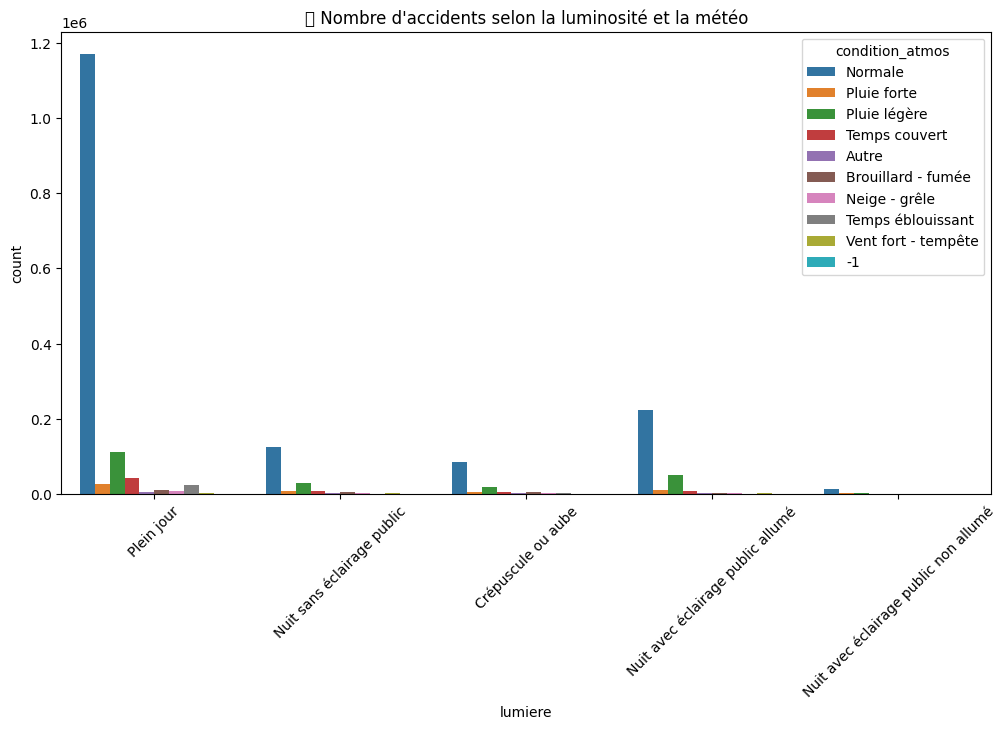

In [106]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_full, x="lumiere", hue="condition_atmos")
plt.title("🌤️ Nombre d'accidents selon la luminosité et la météo")
plt.xticks(rotation=45)
plt.show()


/Users/dahanifernando/Simplon/brief-analyse-traffic/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


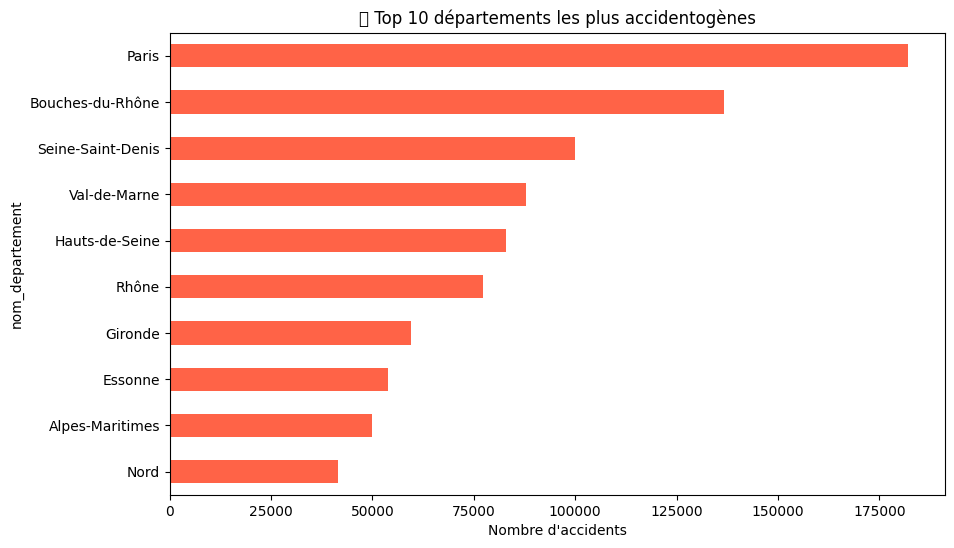

In [107]:
top_depts = (
    df_full["nom_departement"]
    .value_counts()
    .head(10)
    .sort_values(ascending=True)
)

top_depts.plot(kind="barh", figsize=(10,6), color="tomato")
plt.title("🏙️ Top 10 départements les plus accidentogènes")
plt.xlabel("Nombre d'accidents")
plt.show()


/Users/dahanifernando/Simplon/brief-analyse-traffic/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


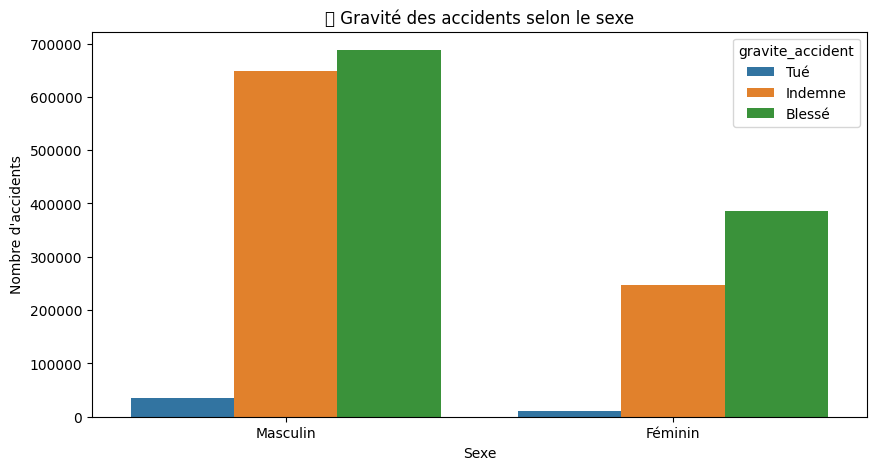

/Users/dahanifernando/Simplon/brief-analyse-traffic/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128694 (\N{PEDESTRIAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


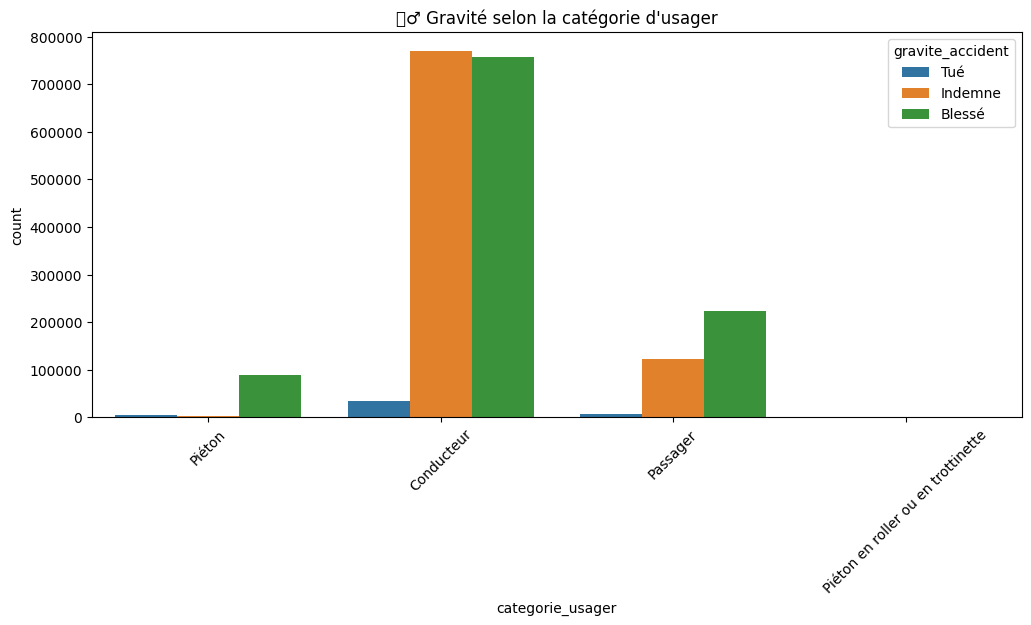

In [108]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_full, x="sexe", hue="gravite_accident")
plt.title("👥 Gravité des accidents selon le sexe")
plt.xlabel("Sexe")
plt.ylabel("Nombre d'accidents")
plt.show()

plt.figure(figsize=(12,5))
sns.countplot(data=df_full, x="categorie_usager", hue="gravite_accident")
plt.title("🚶‍♂️ Gravité selon la catégorie d'usager")
plt.xticks(rotation=45)
plt.show()


/Users/dahanifernando/Simplon/brief-analyse-traffic/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


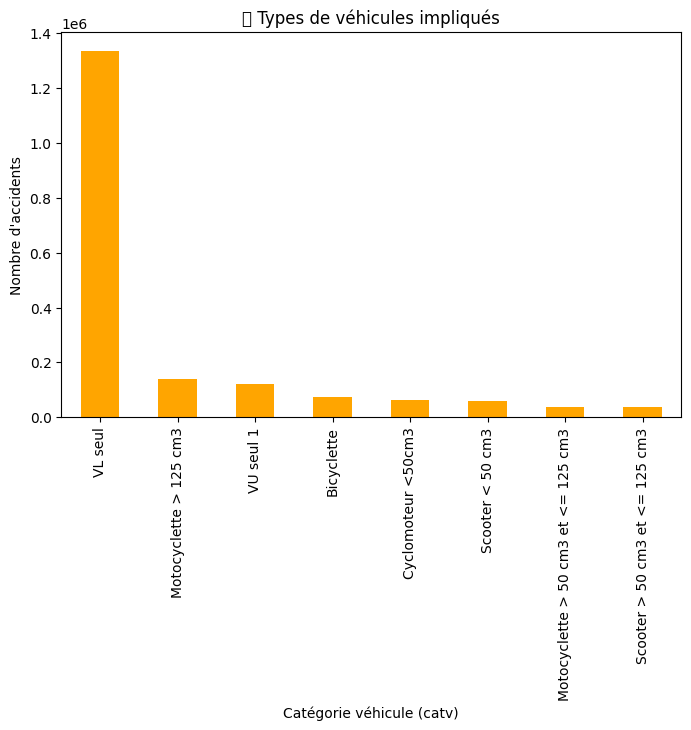

In [109]:
df_full['catv'].value_counts().head(8).plot(kind='bar', color='orange', figsize=(8,5))
plt.title("🚗 Types de véhicules impliqués")
plt.xlabel("Catégorie véhicule (catv)")
plt.ylabel("Nombre d'accidents")
plt.show()


/Users/dahanifernando/Simplon/brief-analyse-traffic/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


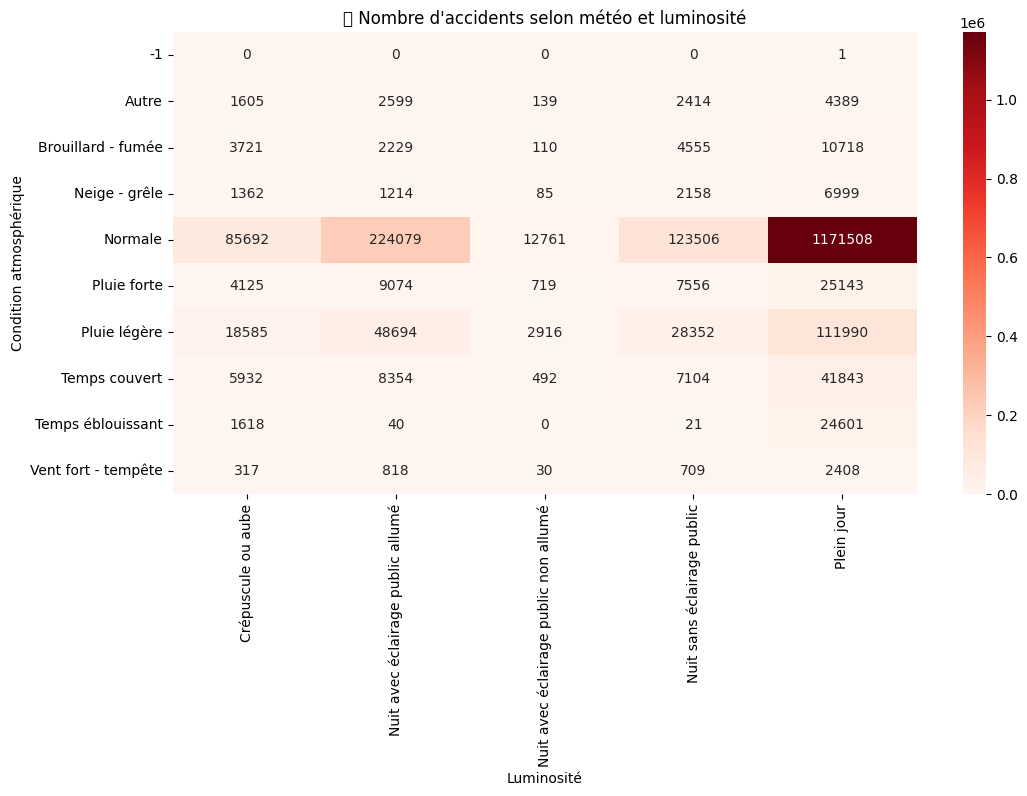

In [110]:
risk = (
    df_full.groupby(["condition_atmos", "lumiere"])
    .size()
    .reset_index(name="nb_accidents")
)

pivot = risk.pivot(index="condition_atmos", columns="lumiere", values="nb_accidents").fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, cmap="Reds", fmt=".0f")
plt.title("🔥 Nombre d'accidents selon météo et luminosité")
plt.xlabel("Luminosité")
plt.ylabel("Condition atmosphérique")
plt.show()


/Users/dahanifernando/Simplon/brief-analyse-traffic/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


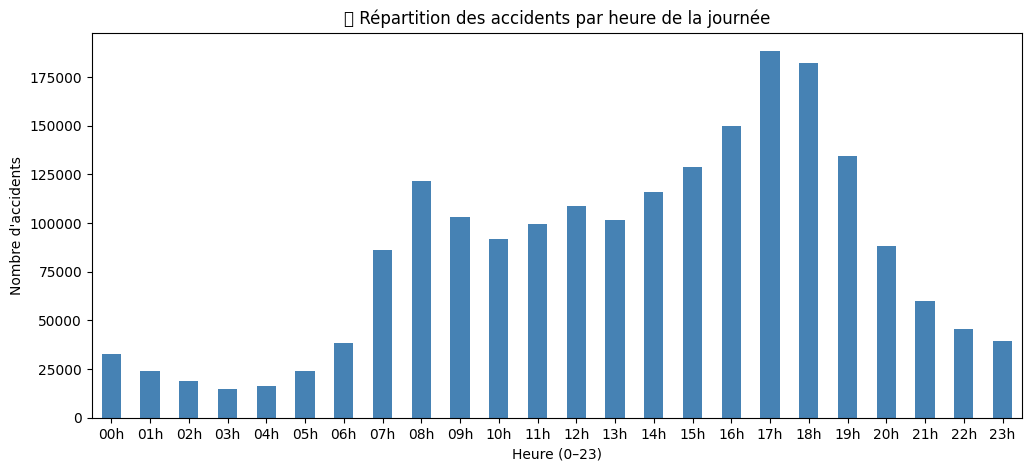

In [111]:
# 🕐 Extraction propre de l'heure à partir de la colonne hrmn
# (elle peut être sous forme "HH:MM" ou "HHMM" ou "8h30")
df_full["heure"] = (
    df_full["hrmn"]
    .astype(str)
    .str.extract(r"(\d{1,2})")  # extrait les 1 ou 2 premiers chiffres
    .astype(float)
    .fillna(0)
    .astype(int)
)

# 🧮 Compter le nombre d'accidents par heure
accidents_par_heure = (
    df_full["heure"]
    .value_counts()
    .reindex(range(24), fill_value=0)  # garantit les 24 heures
    .sort_index()
)

# 📊 Visualisation
plt.figure(figsize=(12,5))
accidents_par_heure.plot(kind="bar", color="steelblue")
plt.title("⏰ Répartition des accidents par heure de la journée")
plt.xlabel("Heure (0–23)")
plt.ylabel("Nombre d'accidents")
plt.xticks(range(24), labels=[f"{h:02d}h" for h in range(24)], rotation=0)
plt.show()


/Users/dahanifernando/Simplon/brief-analyse-traffic/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


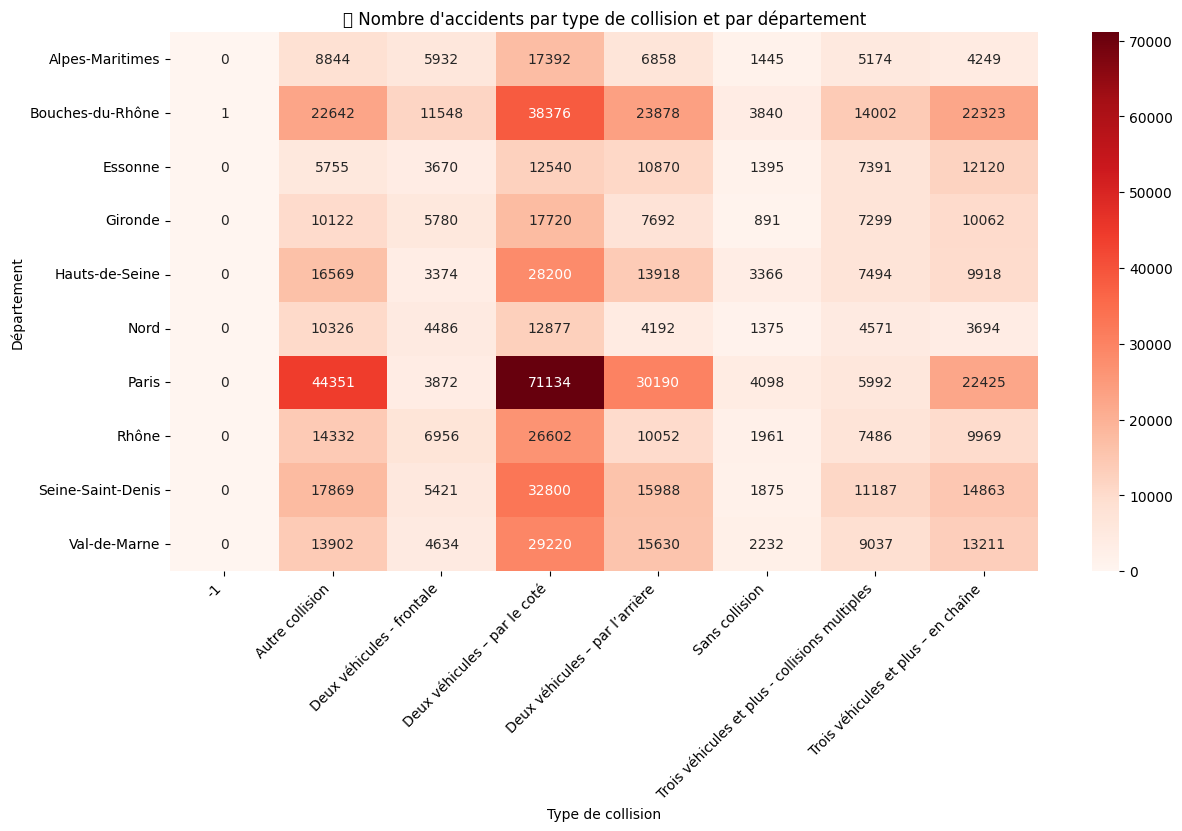

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Comptage des accidents par département et type de collision
collision_stats = (
    df_full.groupby(["nom_departement", "collision"])
    .size()
    .reset_index(name="nb_accidents")
)

# Création du tableau croisé pour la heatmap
pivot = (
    collision_stats
    .pivot(index="nom_departement", columns="collision", values="nb_accidents")
    .fillna(0)
)

# Limiter aux 10 départements les plus accidentogènes (facilite la lecture)
top_depts = (
    df_full["nom_departement"].value_counts().head(10).index
)
pivot = pivot.loc[pivot.index.intersection(top_depts)]

# Visualisation
plt.figure(figsize=(14,7))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="Reds")
plt.title("🔥 Nombre d'accidents par type de collision et par département")
plt.xlabel("Type de collision")
plt.ylabel("Département")
plt.xticks(rotation=45, ha="right")
plt.show()


# dim contexxte

In [113]:
query = """
SELECT 
    f.id_accident,
    c.lumiere,
    c.condition_atmos,
    c.collision,
    c.categorie_route,
    c.infrastructure,
    c.situation_accident,
    c.nombre_voie_circulation
FROM fact_accidents f
JOIN dim_contexte c ON f.id_contexte = c.id_contexte
"""
df_context = pd.read_sql_query(query, conn)
df_context.head()


,id_accident,lumiere,condition_atmos,collision,categorie_route,infrastructure,situation_accident,nombre_voie_circulation
0,201200031426,Plein jour,Normale,Autre collision,Voie Communale,None,Sur chaussée,3.0
1,201200033130,Plein jour,Normale,Autre collision,Voie Communale,None,Sur chaussée,2.0
2,201200037132,Nuit sans éclairage public,Normale,Deux véhicules – par l’arrière,Route Départementale,None,Sur chaussée,1.0
3,201200023044,Nuit sans éclairage public,Normale,Autre collision,Autoroute,None,Sur chaussée,2.0
4,201200030026,Plein jour,Normale,Deux véhicules - frontale,Voie Communale,Carrefour aménagé,None,2.0


## dataviz

/Users/dahanifernando/Simplon/brief-analyse-traffic/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128165 (\N{COLLISION SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


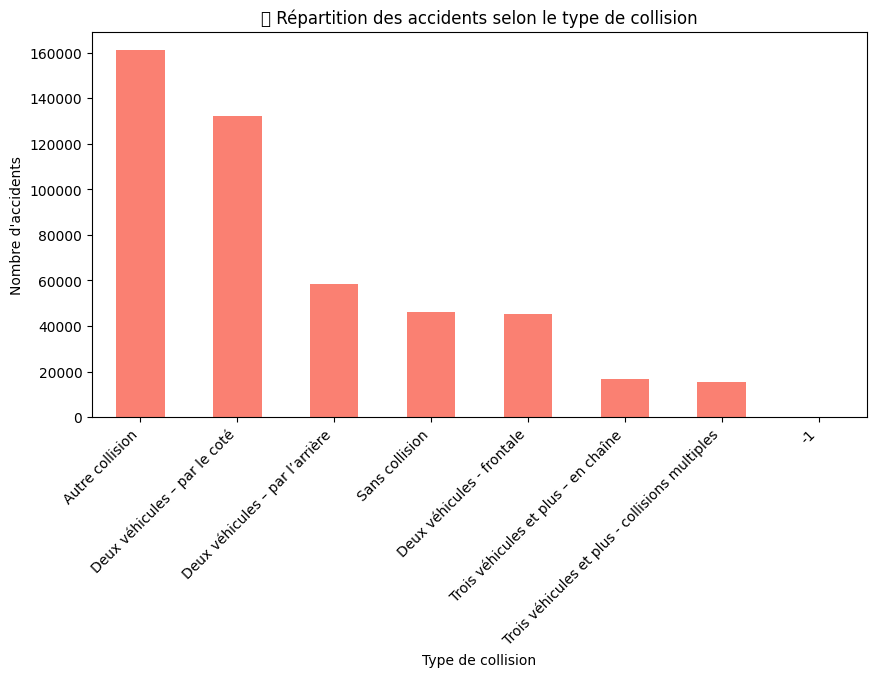

In [114]:
plt.figure(figsize=(10,5))
df_context["collision"].value_counts().head(10).plot(kind="bar", color="salmon")
plt.title("💥 Répartition des accidents selon le type de collision")
plt.xlabel("Type de collision")
plt.ylabel("Nombre d'accidents")
plt.xticks(rotation=45, ha="right")
plt.show()


/Users/dahanifernando/Simplon/brief-analyse-traffic/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


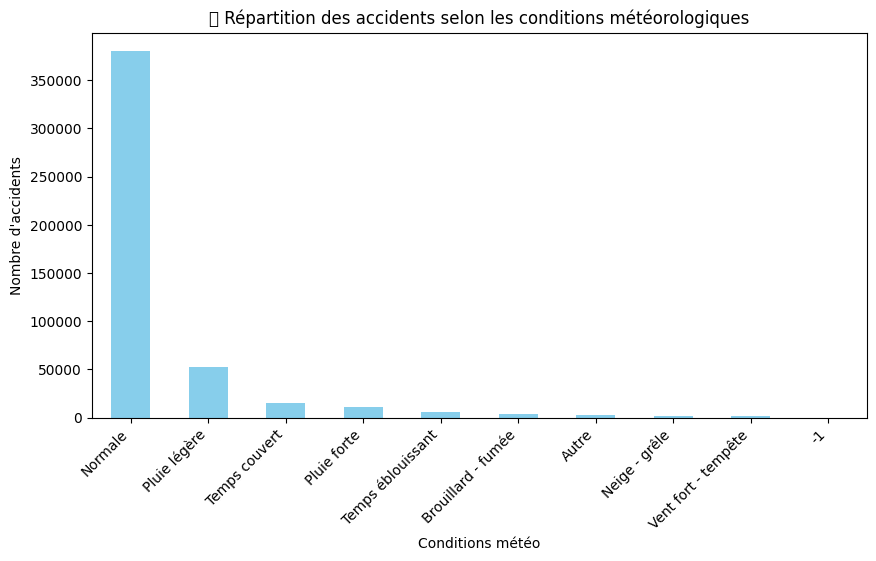

In [115]:
plt.figure(figsize=(10,5))
df_context["condition_atmos"].value_counts().plot(kind="bar", color="skyblue")
plt.title("🌦️ Répartition des accidents selon les conditions météorologiques")
plt.xlabel("Conditions météo")
plt.ylabel("Nombre d'accidents")
plt.xticks(rotation=45, ha="right")
plt.show()


/var/folders/f7/x2q7zyyn1md5k9447n0knbrc0000gn/T/ipykernel_1561/2520581642.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_context, y="lumiere", order=df_context["lumiere"].value_counts().index, palette="mako")
/Users/dahanifernando/Simplon/brief-analyse-traffic/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


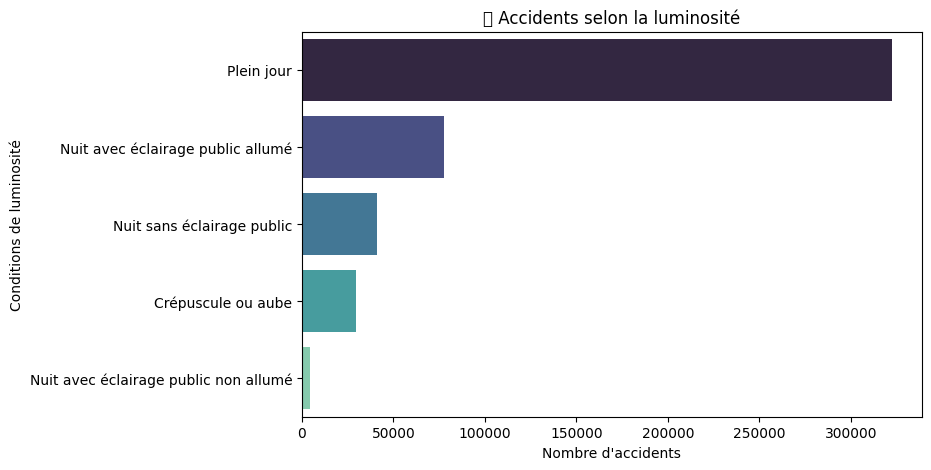

In [116]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_context, y="lumiere", order=df_context["lumiere"].value_counts().index, palette="mako")
plt.title("💡 Accidents selon la luminosité")
plt.xlabel("Nombre d'accidents")
plt.ylabel("Conditions de luminosité")
plt.show()


/var/folders/f7/x2q7zyyn1md5k9447n0knbrc0000gn/T/ipykernel_1561/3543265821.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_context, y="categorie_route", order=df_context["categorie_route"].value_counts().index[:10], palette="coolwarm")
/Users/dahanifernando/Simplon/brief-analyse-traffic/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128739 (\N{MOTORWAY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


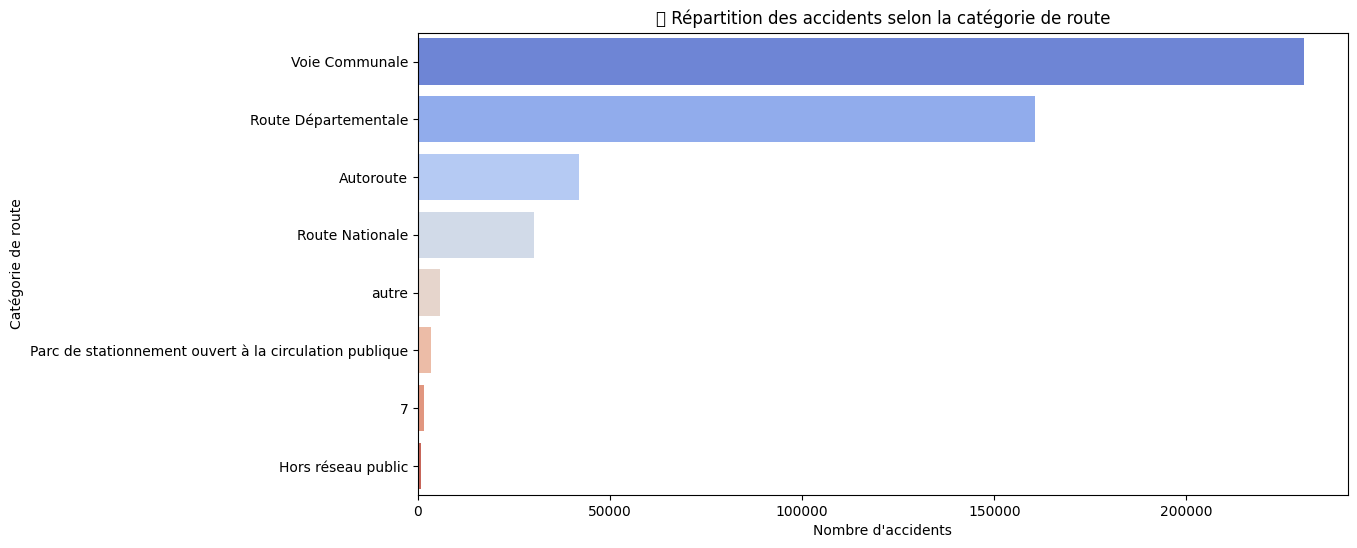

In [117]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_context, y="categorie_route", order=df_context["categorie_route"].value_counts().index[:10], palette="coolwarm")
plt.title("🛣️ Répartition des accidents selon la catégorie de route")
plt.xlabel("Nombre d'accidents")
plt.ylabel("Catégorie de route")
plt.show()


/Users/dahanifernando/Simplon/brief-analyse-traffic/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128679 (\N{CONSTRUCTION SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


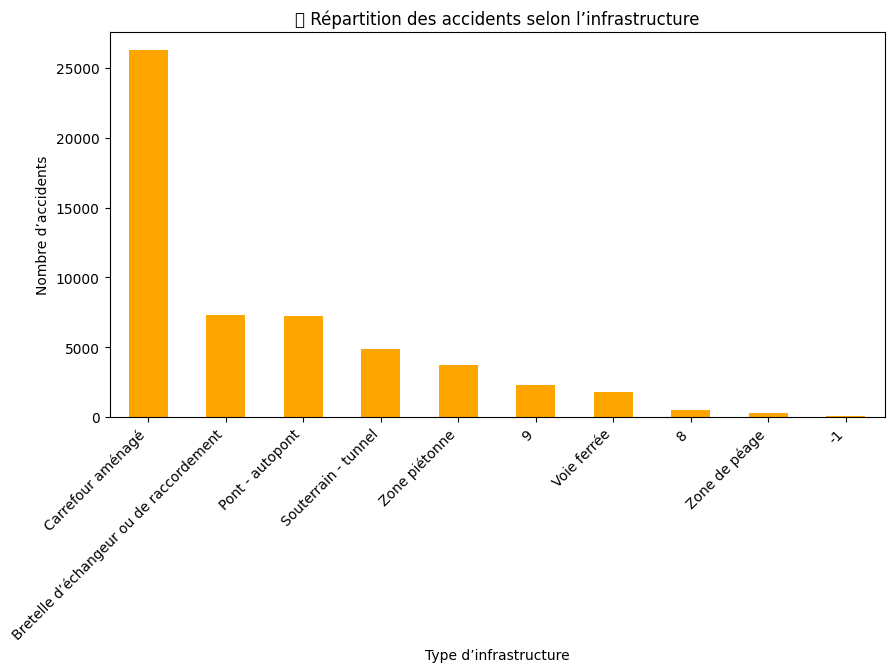

In [118]:
plt.figure(figsize=(10,5))
df_context["infrastructure"].value_counts().head(10).plot(kind="bar", color="orange")
plt.title("🚧 Répartition des accidents selon l’infrastructure")
plt.xlabel("Type d’infrastructure")
plt.ylabel("Nombre d’accidents")
plt.xticks(rotation=45, ha="right")
plt.show()


/Users/dahanifernando/Simplon/brief-analyse-traffic/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


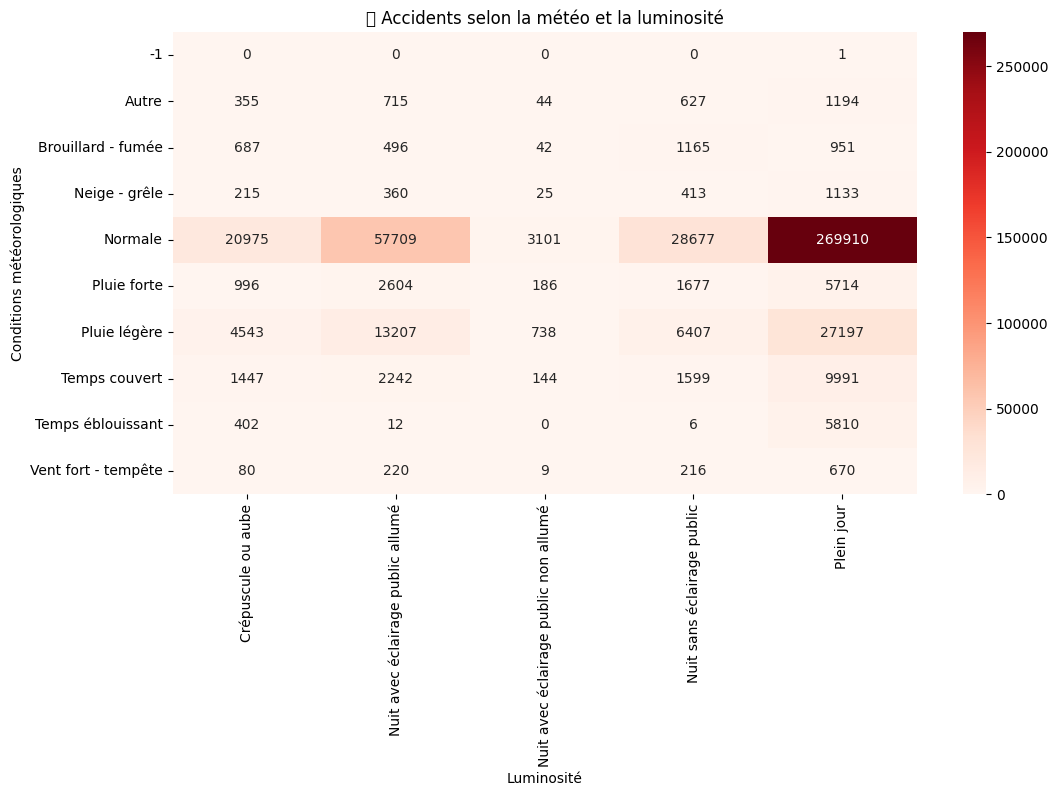

In [119]:
heat = (
    df_context.groupby(["condition_atmos", "lumiere"])
    .size()
    .reset_index(name="nb_accidents")
)

pivot = heat.pivot(index="condition_atmos", columns="lumiere", values="nb_accidents").fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="Reds", annot=True, fmt=".0f")
plt.title("🔥 Accidents selon la météo et la luminosité")
plt.xlabel("Luminosité")
plt.ylabel("Conditions météorologiques")
plt.show()


/Users/dahanifernando/Simplon/brief-analyse-traffic/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


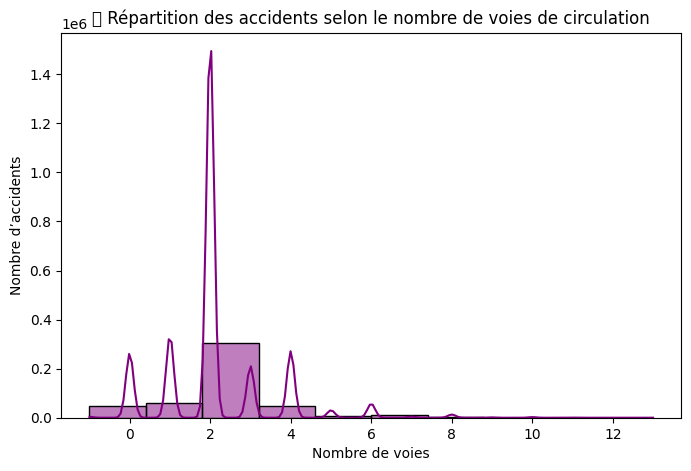

In [120]:
plt.figure(figsize=(8,5))
sns.histplot(df_context["nombre_voie_circulation"], bins=10, kde=True, color="purple")
plt.title("🚗 Répartition des accidents selon le nombre de voies de circulation")
plt.xlabel("Nombre de voies")
plt.ylabel("Nombre d’accidents")
plt.show()


/Users/dahanifernando/Simplon/brief-analyse-traffic/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127780 (\N{WHITE SUN WITH SMALL CLOUD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


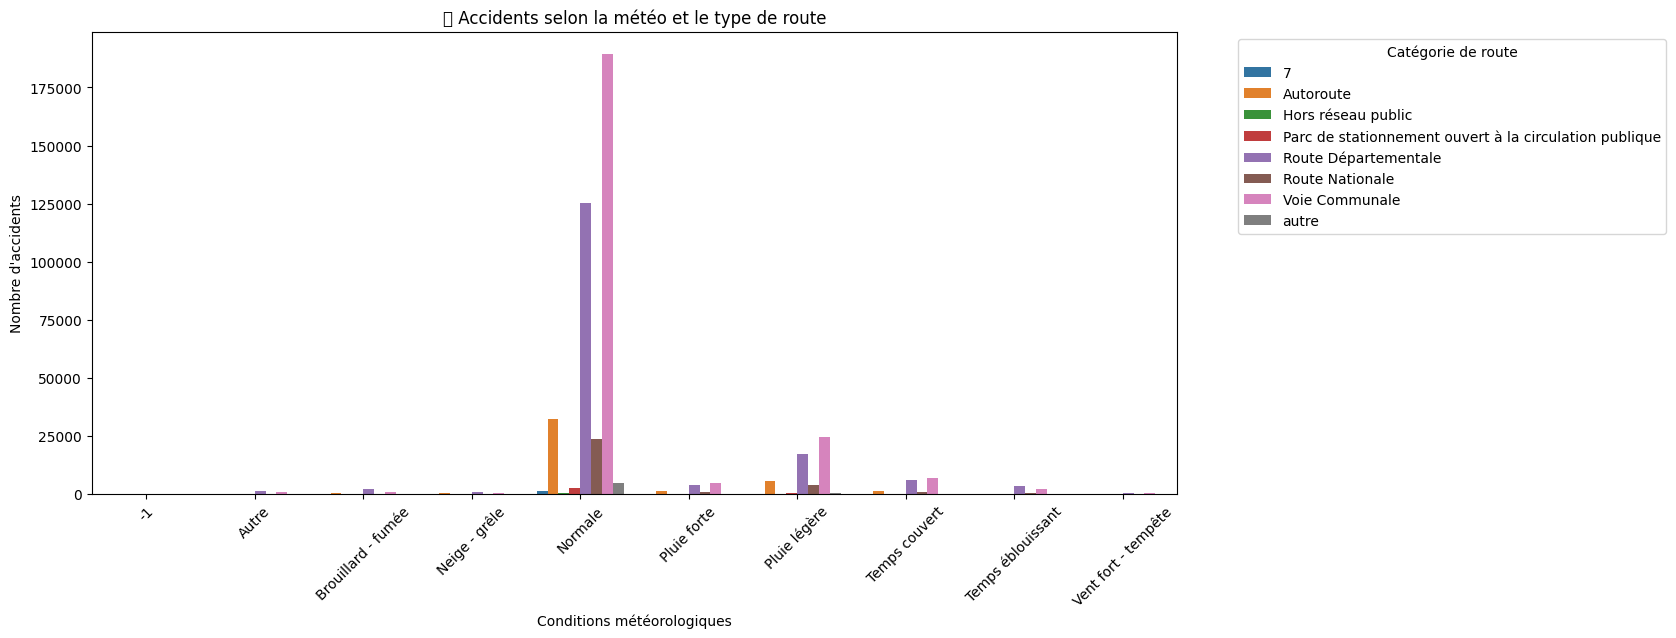

In [121]:
cross = (
    df_context.groupby(["condition_atmos", "categorie_route"])
    .size()
    .reset_index(name="nb_accidents")
)

plt.figure(figsize=(14,6))
sns.barplot(data=cross, x="condition_atmos", y="nb_accidents", hue="categorie_route", palette="tab10")
plt.title("🌤️ Accidents selon la météo et le type de route")
plt.xlabel("Conditions météorologiques")
plt.ylabel("Nombre d'accidents")
plt.legend(title="Catégorie de route", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.show()


## v2

In [122]:
query = """
SELECT 
    f.id_accident,
    c.lumiere,
    c.condition_atmos,
    c.collision,
    c.categorie_route,
    c.infrastructure,
    c.situation_accident,
    c.nombre_voie_circulation
FROM fact_accidents f
JOIN dim_contexte c ON f.id_contexte = c.id_contexte
"""
df_context = pd.read_sql_query(query, conn)
df_context.head()


,id_accident,lumiere,condition_atmos,collision,categorie_route,infrastructure,situation_accident,nombre_voie_circulation
0,201200031426,Plein jour,Normale,Autre collision,Voie Communale,None,Sur chaussée,3.0
1,201200033130,Plein jour,Normale,Autre collision,Voie Communale,None,Sur chaussée,2.0
2,201200037132,Nuit sans éclairage public,Normale,Deux véhicules – par l’arrière,Route Départementale,None,Sur chaussée,1.0
3,201200023044,Nuit sans éclairage public,Normale,Autre collision,Autoroute,None,Sur chaussée,2.0
4,201200030026,Plein jour,Normale,Deux véhicules - frontale,Voie Communale,Carrefour aménagé,None,2.0


/Users/dahanifernando/Simplon/brief-analyse-traffic/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128165 (\N{COLLISION SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


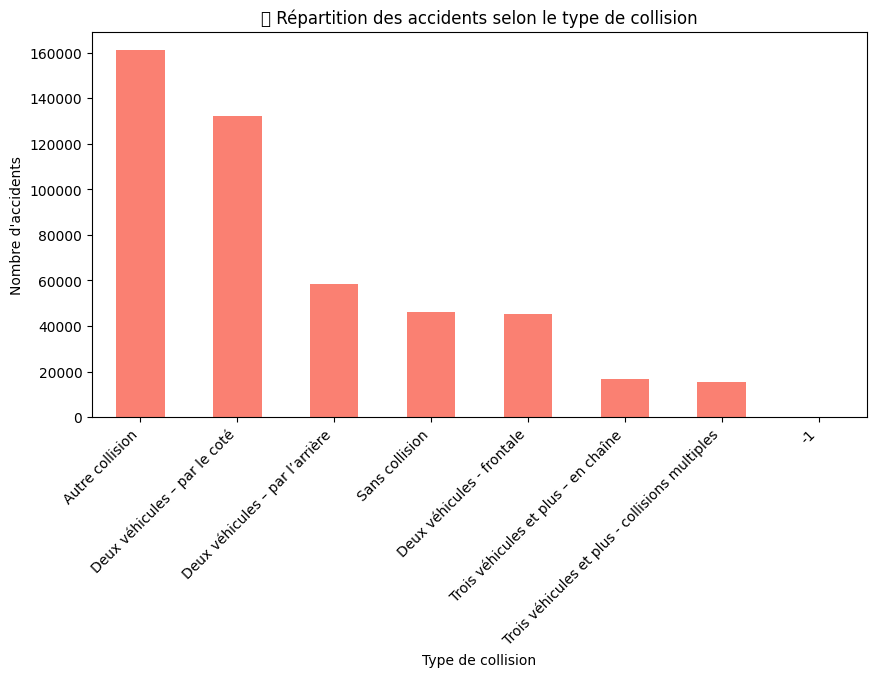

In [123]:
plt.figure(figsize=(10,5))
df_context["collision"].value_counts().head(10).plot(kind="bar", color="salmon")
plt.title("💥 Répartition des accidents selon le type de collision")
plt.xlabel("Type de collision")
plt.ylabel("Nombre d'accidents")
plt.xticks(rotation=45, ha="right")
plt.show()


/Users/dahanifernando/Simplon/brief-analyse-traffic/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


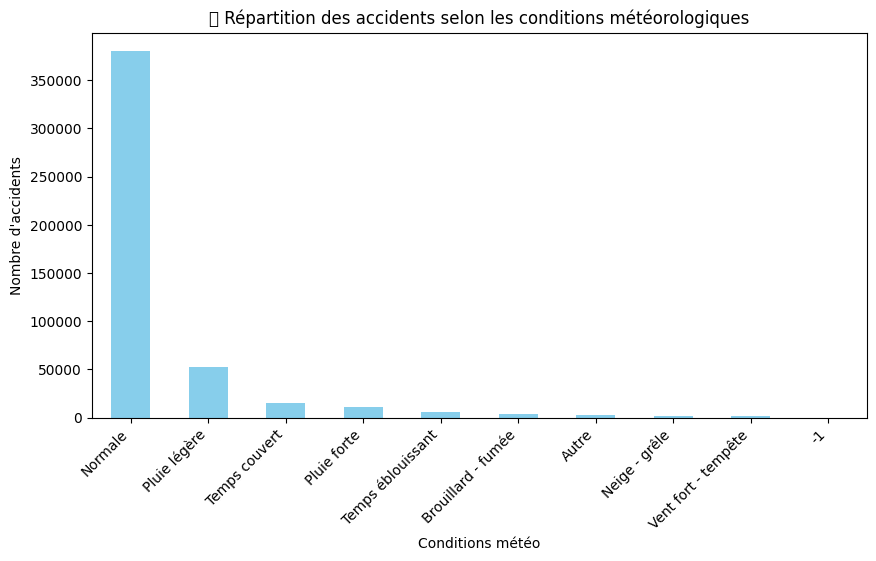

In [124]:
plt.figure(figsize=(10,5))
df_context["condition_atmos"].value_counts().plot(kind="bar", color="skyblue")
plt.title("🌦️ Répartition des accidents selon les conditions météorologiques")
plt.xlabel("Conditions météo")
plt.ylabel("Nombre d'accidents")
plt.xticks(rotation=45, ha="right")
plt.show()


/var/folders/f7/x2q7zyyn1md5k9447n0knbrc0000gn/T/ipykernel_1561/2520581642.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_context, y="lumiere", order=df_context["lumiere"].value_counts().index, palette="mako")
/Users/dahanifernando/Simplon/brief-analyse-traffic/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


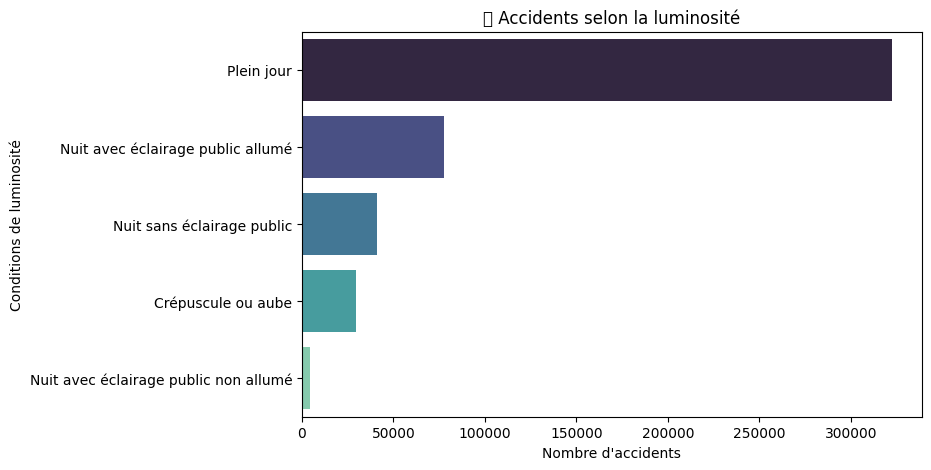

In [125]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_context, y="lumiere", order=df_context["lumiere"].value_counts().index, palette="mako")
plt.title("💡 Accidents selon la luminosité")
plt.xlabel("Nombre d'accidents")
plt.ylabel("Conditions de luminosité")
plt.show()


/var/folders/f7/x2q7zyyn1md5k9447n0knbrc0000gn/T/ipykernel_1561/3543265821.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_context, y="categorie_route", order=df_context["categorie_route"].value_counts().index[:10], palette="coolwarm")
/Users/dahanifernando/Simplon/brief-analyse-traffic/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128739 (\N{MOTORWAY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


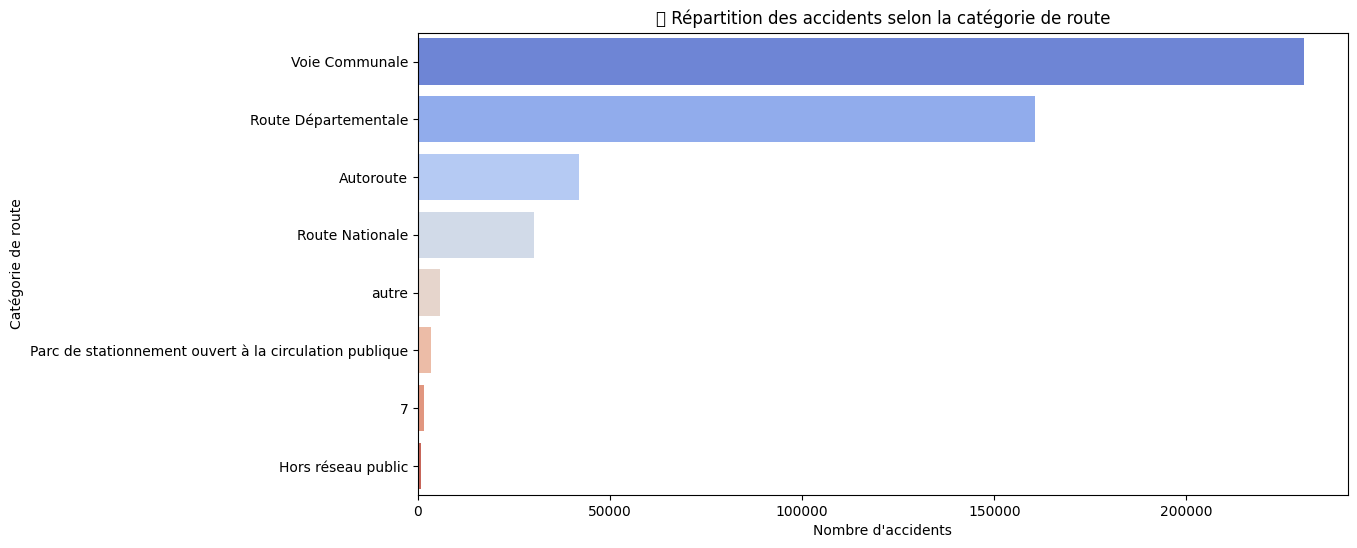

In [126]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_context, y="categorie_route", order=df_context["categorie_route"].value_counts().index[:10], palette="coolwarm")
plt.title("🛣️ Répartition des accidents selon la catégorie de route")
plt.xlabel("Nombre d'accidents")
plt.ylabel("Catégorie de route")
plt.show()


/Users/dahanifernando/Simplon/brief-analyse-traffic/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128679 (\N{CONSTRUCTION SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


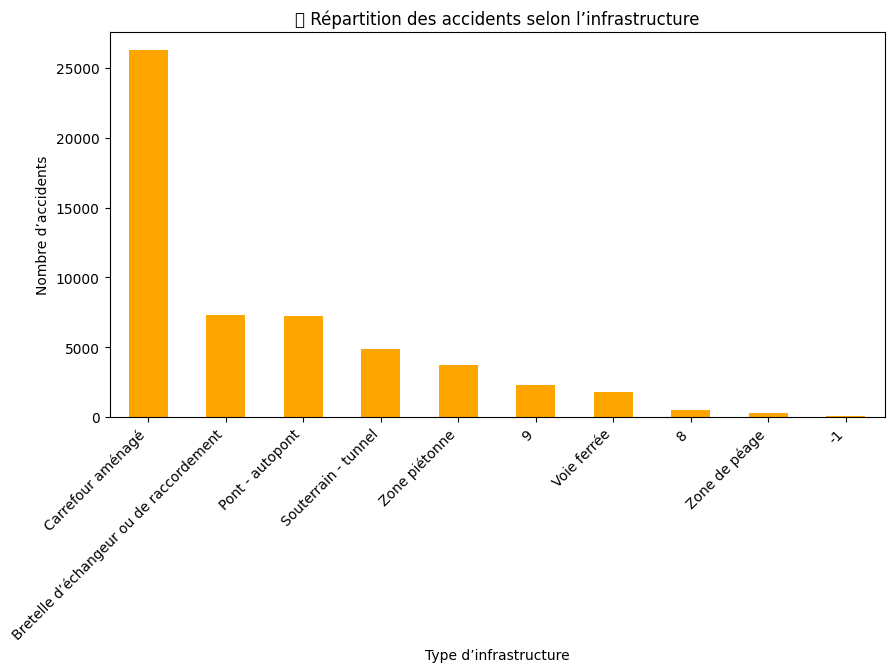

In [127]:
plt.figure(figsize=(10,5))
df_context["infrastructure"].value_counts().head(10).plot(kind="bar", color="orange")
plt.title("🚧 Répartition des accidents selon l’infrastructure")
plt.xlabel("Type d’infrastructure")
plt.ylabel("Nombre d’accidents")
plt.xticks(rotation=45, ha="right")
plt.show()


/Users/dahanifernando/Simplon/brief-analyse-traffic/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


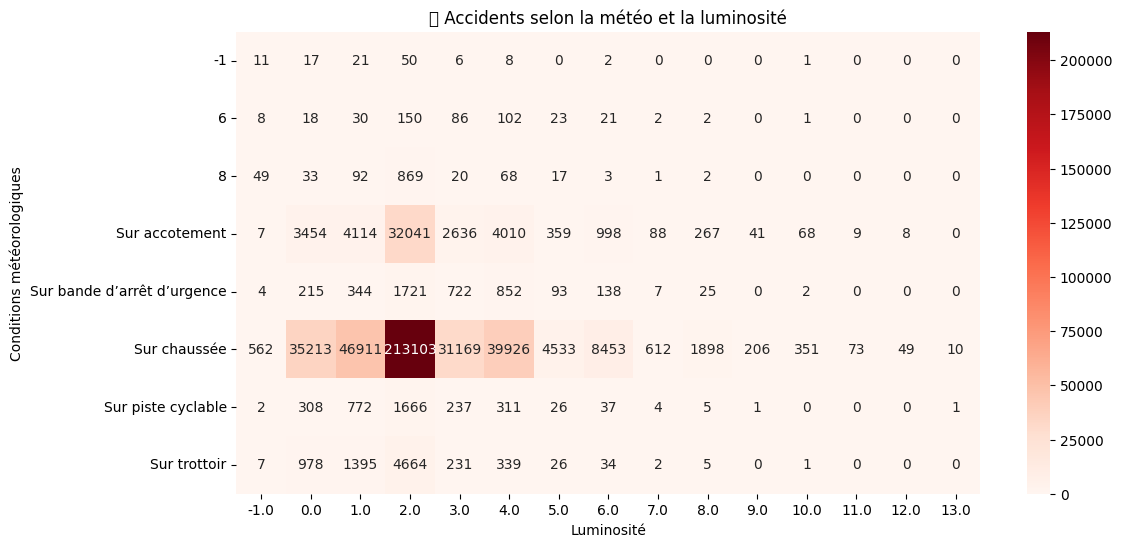

In [132]:
heat = (
    df_context.groupby(["situation_accident", "nombre_voie_circulation"])
    .size()
    .reset_index(name="nb_accidents")
)

pivot = heat.pivot(index="situation_accident", columns="nombre_voie_circulation", values="nb_accidents").fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="Reds", annot=True, fmt=".0f")
plt.title("🔥 Accidents selon la météo et la luminosité")
plt.xlabel("Luminosité")
plt.ylabel("Conditions météorologiques")
plt.show()
